In [8]:
import os
import numpy as np
import pandas as pd
import sklearn.metrics
import matplotlib.pyplot as plt

--------------------------------------------------------------------------------
Delta
0 origin
              precision    recall  f1-score   support

           1       0.88      0.75      0.81       392
           2       0.96      0.98      0.97      2321

    accuracy                           0.95      2713
   macro avg       0.92      0.87      0.89      2713
weighted avg       0.95      0.95      0.95      2713

1 xdawn
              precision    recall  f1-score   support

           1       0.92      0.82      0.87       392
           2       0.97      0.99      0.98      2321

    accuracy                           0.96      2713
   macro avg       0.94      0.90      0.92      2713
weighted avg       0.96      0.96      0.96      2713



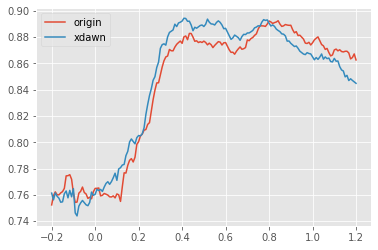

--------------------------------------------------------------------------------
Theta
0 origin
              precision    recall  f1-score   support

           1       0.94      0.44      0.60       392
           2       0.91      1.00      0.95      2321

    accuracy                           0.91      2713
   macro avg       0.93      0.72      0.78      2713
weighted avg       0.92      0.91      0.90      2713

1 xdawn
              precision    recall  f1-score   support

           1       0.84      0.65      0.73       392
           2       0.94      0.98      0.96      2321

    accuracy                           0.93      2713
   macro avg       0.89      0.81      0.85      2713
weighted avg       0.93      0.93      0.93      2713



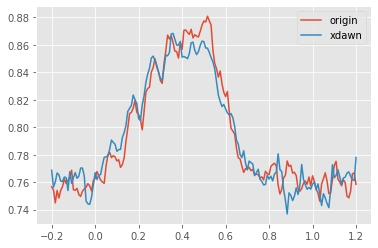

--------------------------------------------------------------------------------
Delta
0 origin
              precision    recall  f1-score   support

           1       0.96      0.90      0.93       448
           2       0.98      0.99      0.99      2594

    accuracy                           0.98      3042
   macro avg       0.97      0.95      0.96      3042
weighted avg       0.98      0.98      0.98      3042

1 xdawn
              precision    recall  f1-score   support

           1       0.99      0.95      0.97       448
           2       0.99      1.00      0.99      2594

    accuracy                           0.99      3042
   macro avg       0.99      0.97      0.98      3042
weighted avg       0.99      0.99      0.99      3042



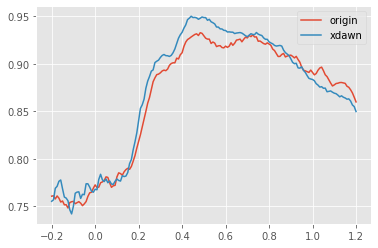

--------------------------------------------------------------------------------
Theta
0 origin
              precision    recall  f1-score   support

           1       0.88      0.54      0.67       448
           2       0.93      0.99      0.96      2594

    accuracy                           0.92      3042
   macro avg       0.90      0.76      0.81      3042
weighted avg       0.92      0.92      0.91      3042

1 xdawn
              precision    recall  f1-score   support

           1       0.97      0.77      0.86       448
           2       0.96      1.00      0.98      2594

    accuracy                           0.96      3042
   macro avg       0.97      0.88      0.92      3042
weighted avg       0.96      0.96      0.96      3042



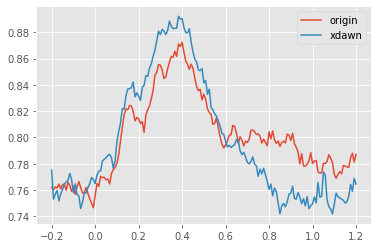

--------------------------------------------------------------------------------
Delta
0 origin
              precision    recall  f1-score   support

           1       0.79      0.76      0.78       504
           2       0.96      0.97      0.97      3215

    accuracy                           0.94      3719
   macro avg       0.88      0.87      0.87      3719
weighted avg       0.94      0.94      0.94      3719

1 xdawn
              precision    recall  f1-score   support

           1       0.74      0.87      0.80       504
           2       0.98      0.95      0.97      3215

    accuracy                           0.94      3719
   macro avg       0.86      0.91      0.88      3719
weighted avg       0.95      0.94      0.94      3719



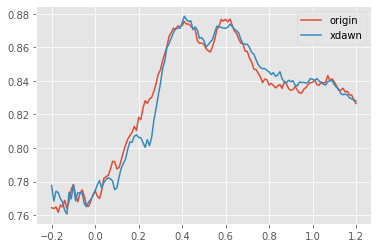

--------------------------------------------------------------------------------
Theta
0 origin
              precision    recall  f1-score   support

           1       0.60      0.41      0.49       504
           2       0.91      0.96      0.93      3215

    accuracy                           0.88      3719
   macro avg       0.76      0.68      0.71      3719
weighted avg       0.87      0.88      0.87      3719

1 xdawn
              precision    recall  f1-score   support

           1       0.62      0.60      0.61       504
           2       0.94      0.94      0.94      3215

    accuracy                           0.90      3719
   macro avg       0.78      0.77      0.78      3719
weighted avg       0.90      0.90      0.90      3719



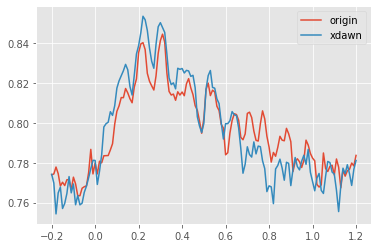

In [9]:
plt.style.use('ggplot')

for regexp in ['MEG_S01', 'MEG_S02', 'EEG_S02']:
    df = pd.read_json('MVPA_predicts_{}.json'.format(regexp))

    for freq in df.columns:
        print('-' * 80)
        print(freq)
        for idx in df[freq].index:
            x = df[freq][idx]
            name = x[0]
            y_true = x[1]['y_true']
            y_pred = x[1]['y_predict']
            y_time_pred = np.array(x[1]['y_time_predict'])
            times = x[1]['times']
            print(idx, name)

             # All time report
            print(sklearn.metrics.classification_report(y_pred=y_pred, y_true=y_true))
            # Window time report
            scores = np.zeros(y_time_pred.shape[1])
            for j, y_pred in enumerate(y_time_pred.transpose()):
                scores[j] = sklearn.metrics.precision_score(y_pred=y_pred, y_true=y_true, average='weighted')
            plt.plot(times, scores, label=name)
        plt.legend()
        plt.show()